## Primer rada prosirivanja podataka

Sadrzaj ovog fajla sluzi kao primer primena transformacija nad podacima.

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
cd drive/MyDrive/panoptic

/content/drive/.shortcut-targets-by-id/1i1O5IzicKZOnN9ws7xZ6NJuTmO6MumG4/panoptic


In [3]:
height, width = 1080, 1920

In [ ]:
import matplotlib.pyplot as plt
from codes.mask_rcnn.augmented_set import DatasetAugs
import matplotlib.patches as patches
import torch
import albumentations as A
import cv2

In [4]:
#D4_transforms = [#A.Resize(height//2, width//2, interpolation=cv2.INTER_LINEAR, p=1),
                # D4 Group augmentations
                #A.HorizontalFlip(p=1),
                #A.VerticalFlip(p=0.5),
                #A.RandomRotate90(p=0.5),
                #A.Transpose(p=0.5),
                #A.Normalize()
                #]

In [6]:
width, height = 1920, 1080

In [ ]:
geom_transforms =  [A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=5,
                       interpolation=cv2.INTER_LINEAR, border_mode=cv2.BORDER_CONSTANT, value=0, mask_value=0, p=0.5),

                    A.HorizontalFlip(p=0.5),
                    A.RandomSizedCrop((970, 1070), height, width, w2h_ratio=1.5,
                                        interpolation=cv2.INTER_LINEAR, always_apply=False, p=0.5),
                    #A.Normalize(),
                    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
                    ]

In [ ]:
data = DatasetAugs('./archive/images/',['./archive/training_and_validation/train.json'], geom_transforms)

loading annotations into memory...
Done (t=0.37s)
creating index...
index created!


Original shape: (1080, 1920, 3)


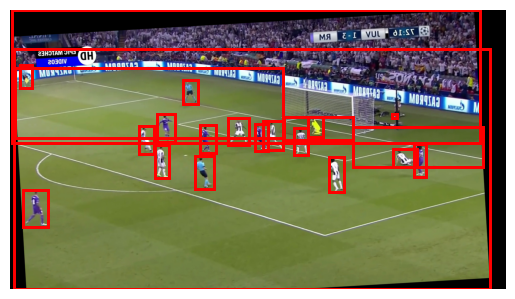

In [ ]:
img, target = data[5]
fig, ax = plt.subplots(1)
ax.imshow(img)

boxes = target['boxes']

for box in boxes:
    x_min, y_min, x_max, y_max = box
    rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                             linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.axis('off')
plt.show()

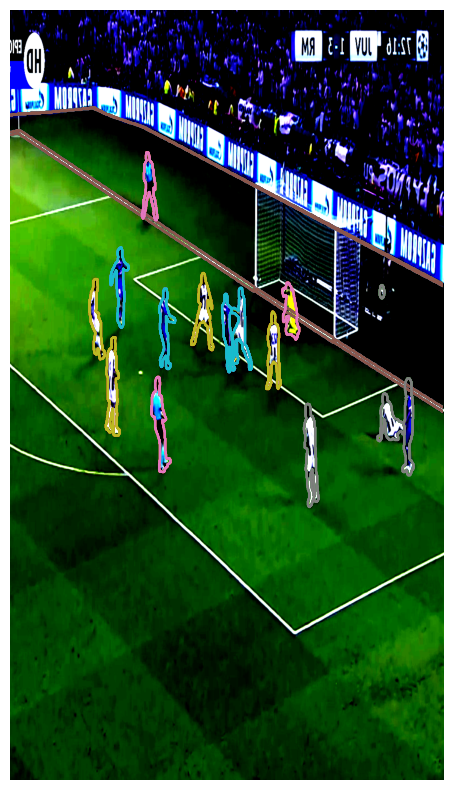

In [ ]:
masks = target['masks']

def plot_image_with_masks(img, masks):
    if isinstance(img, torch.Tensor):
        img = img.permute(1, 2, 0).numpy()

    plt.figure(figsize=(10, 10))
    plt.imshow(img)

    for i, mask in enumerate(masks):
        if isinstance(mask, torch.Tensor):
            mask = mask.numpy()
        plt.contour(mask, colors=[plt.cm.tab10(i / len(masks))], alpha=0.5)

    plt.axis('off')
    plt.show()

plot_image_with_masks(img, masks)


In [8]:
geom_transforms =  [A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=5,
                       interpolation=cv2.INTER_LINEAR, border_mode=cv2.BORDER_CONSTANT, value=0, mask_value=0, p=0.5),

                    A.HorizontalFlip(p=0.5),
                    A.RandomSizedCrop((800, 1070), height, width, w2h_ratio=1920/1080,
                                        interpolation=cv2.INTER_CUBIC, always_apply=False, p=0.5),
                    #A.Normalize(),
                    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5)
                    ]

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


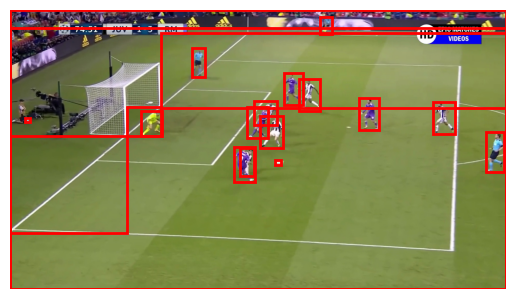

In [20]:
data = DatasetAugs('./archive/images/',['./archive/train_val_test_new/coco_test.json'], geom_transforms, size_factor=2)
img, target = data[160]
fig, ax = plt.subplots(1)
ax.imshow(img)

boxes = target['boxes']

for box in boxes:
    x_min, y_min, x_max, y_max = box
    rect = patches.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                             linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.axis('off')
plt.show()

In [10]:
len(data)

1128